## ASBD LAB 2 - CED19I027 - N. SREE DHYUTI


In [27]:
# CED19I027 - N. SREE DHYUTI - ASBD LAB2

# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import squarify


## 1. Consider a subset of attributes in the given dataset and apply the below given visualization plots in any platform of your choice (Microsoft Excel / LibreOffice Calc / Python(preferred) / R)
1. Bar/Column Chart
2. Pie Chart
3. Doughnut chart
4. Pareto Chart
5. Scatter plot
6. Line Chart
7. Radar Chart
8. Area Chart
9. Histogram

Dataset: IRIS Dataset (https://www.kaggle.com/datasets/uciml/iris)

In [28]:
# 1 - Data Visualization Plots

# Load Dataset
data = pd.read_csv(r"C:\Users\dhyut\SEM8\ASBD LAB\Lab 2\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
# group data w.r.t species
grouped_data = data.groupby("Species")
setosa = grouped_data.get_group("Iris-setosa")
virginica = grouped_data.get_group("Iris-virginica")
versicolor = grouped_data.get_group("Iris-versicolor")

In [30]:
# generate stats - min, max, mean, median, standard deviation
species = [setosa, virginica, versicolor]
attributes = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
vals = []
for i in species:
    something = []
    for j in attributes:
        min_ = min(i[j])
        max_ = max(i[j])
        mean_ = statistics.mean(i[j])
        median_ = statistics.median(i[j])
        standard_deviation = statistics.stdev(i[j])
        something.append([min_, max_, mean_, median_, standard_deviation])
    vals.append(something)

vals

[[[4.3, 5.8, 5.006, 5.0, 0.3524896872134513],
  [2.3, 4.4, 3.418, 3.4, 0.38102439795469095],
  [1.0, 1.9, 1.464, 1.5, 0.17351115943644546],
  [0.1, 0.6, 0.244, 0.2, 0.10720950308167838]],
 [[4.9, 7.9, 6.588, 6.5, 0.6358795932744321],
  [2.2, 3.8, 2.974, 3.0, 0.32249663817263746],
  [4.5, 6.9, 5.552, 5.55, 0.5518946956639834],
  [1.4, 2.5, 2.026, 2.0, 0.27465005563666733]],
 [[4.9, 7.0, 5.936, 5.9, 0.5161711470638634],
  [2.0, 3.4, 2.77, 2.8, 0.3137983233784114],
  [3.0, 5.1, 4.26, 4.35, 0.46991097723995795],
  [1.0, 1.8, 1.326, 1.3, 0.19775268000454405]]]

**Bar Chart**

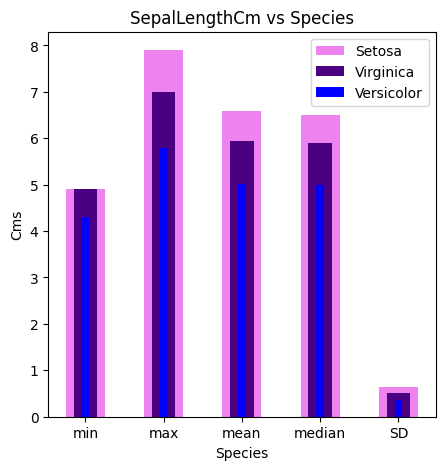

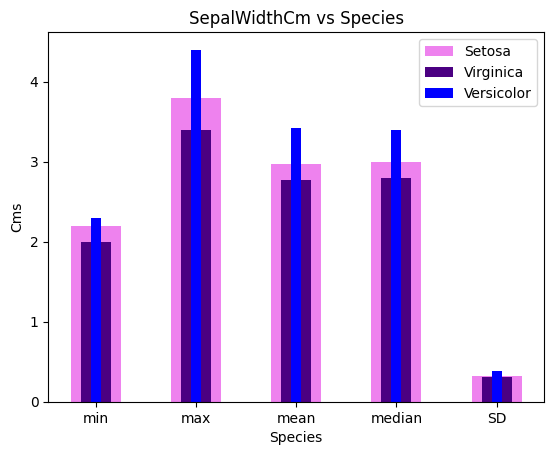

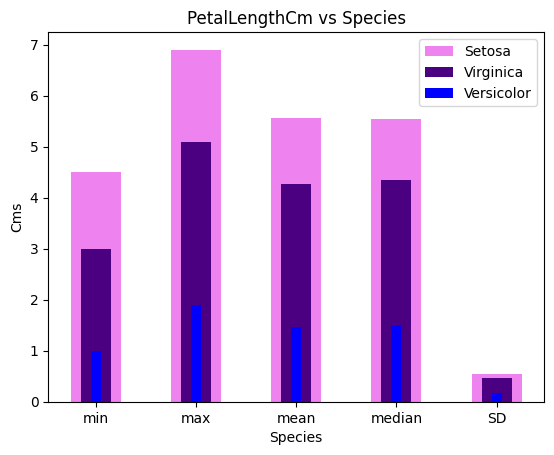

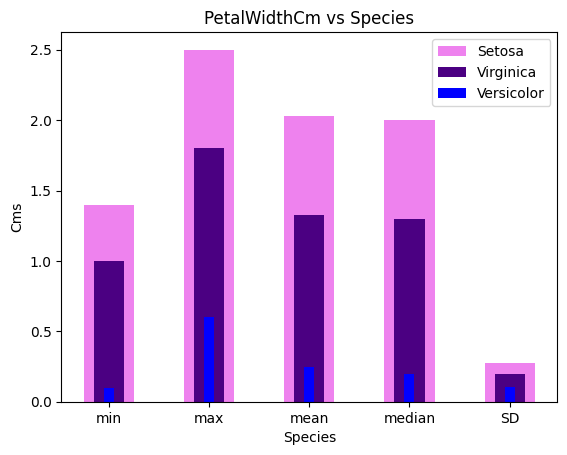

In [31]:
# Bar Chart
fig = plt.figure(figsize = (5, 5))
names = ["Setosa", "Virginica", "Versicolor"]
# creating the bar plot
for i in range(len(attributes)):
    plt.bar(["min", "max", "mean", "median", "SD"], vals[1][i], color ='violet', width = 0.5)
    plt.bar(["min", "max", "mean", "median", "SD"], vals[2][i], color ='indigo', width = 0.3)
    plt.bar(["min", "max", "mean", "median", "SD"], vals[0][i], color ='blue', width = 0.1)
    plt.xlabel("Species")
    plt.ylabel("Cms")
    plt.legend(names)
    plt.title(f"{attributes[i]} vs Species")
    plt.show()

**Pie Chart**

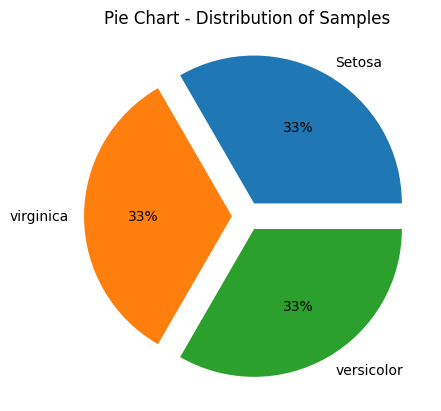

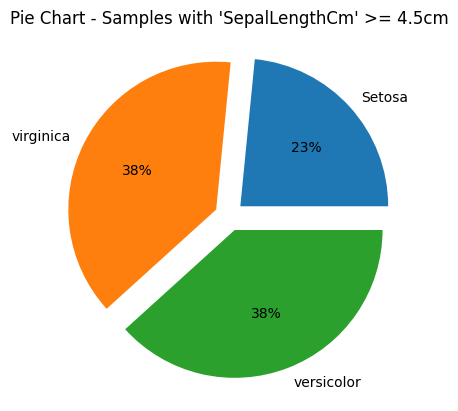

In [32]:
# Pie Chart

# plotting data on chart
explode = [0.1, 0.1, 0.1]
plt.pie([len(setosa), len(virginica), len(versicolor)],labels=["Setosa", "virginica", "versicolor"], explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.title("Pie Chart - Distribution of Samples")
plt.show()

# Other possible Pie Charts
# Eg: Distribution of flowers with SepalLengthCm greater than a specific threshold (in this case - 4.2cm)
threshold = 4.2
total = 0
cnts = []
for i in species:
    count = 0
    for j in i["SepalLengthCm"]:
        if(int(j) >= threshold):
            count += 1
    cnts.append(count)
# plotting data on chart
explode = [0.1, 0.1, 0.1]
plt.pie(cnts,labels=["Setosa", "virginica", "versicolor"], explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.title("Pie Chart - Samples with 'SepalLengthCm' >= 4.5cm")
plt.show()

**Donut Chart**

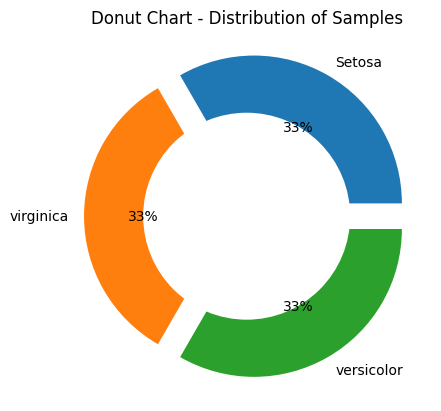

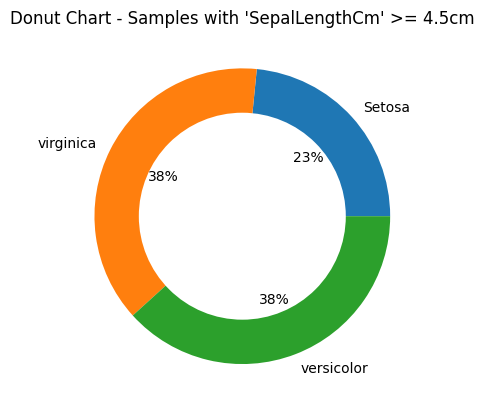

In [33]:
# Donut Chart
explode = [0.1, 0.1, 0.1]
plt.pie([len(setosa), len(virginica), len(versicolor)],labels=["Setosa", "virginica", "versicolor"], explode=explode, autopct='%.0f%%')
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# displaying chart
plt.title("Donut Chart - Distribution of Samples")
plt.show()

# explode = [0.1, 0.1, 0.1]
plt.pie(cnts,labels=["Setosa", "virginica", "versicolor"], autopct='%.0f%%')
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# displaying chart
plt.title("Donut Chart - Samples with 'SepalLengthCm' >= 4.5cm")
plt.show()

**Pareto Chart**

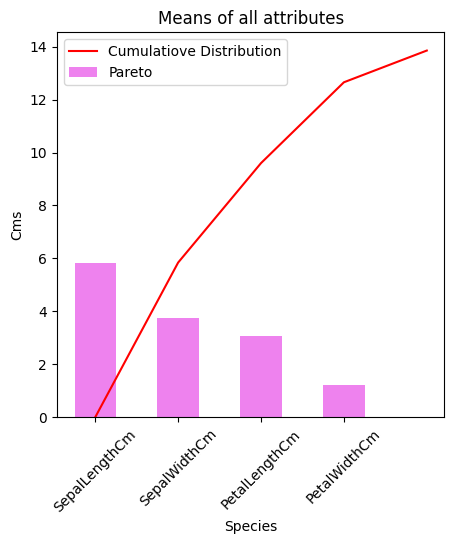

In [34]:
# Pareto Chart - Bar Chart in ascending/descending order
fig = plt.figure(figsize = (5, 5))

plott = []
for i in attributes:
    plott.append([statistics.mean(data[i]), i])

plott = [plott[0][0],plott[1][0], plott[2][0], plott[3][0]]
plott.sort(reverse = True)
cumulative = []
cumulative.append(0)
for i in range(len(plott)):
    if(i == 0):
        cumulative.append(plott[0])
    else:
        cumulative.append(cumulative[i] + plott[i])
    
    
# creating the bar plot
plt.bar(attributes, plott , color ='violet', width = 0.5)
# Cumulative Plot
plt.plot(cumulative, color = "red")

plt.xlabel("Species")
plt.ylabel("Cms")
plt.title(f"Means of all attributes")
plt.legend([ "Cumulatiove Distribution","Pareto"])
plt.xticks(rotation = 45)
plt.show()

**Scatter Plot**

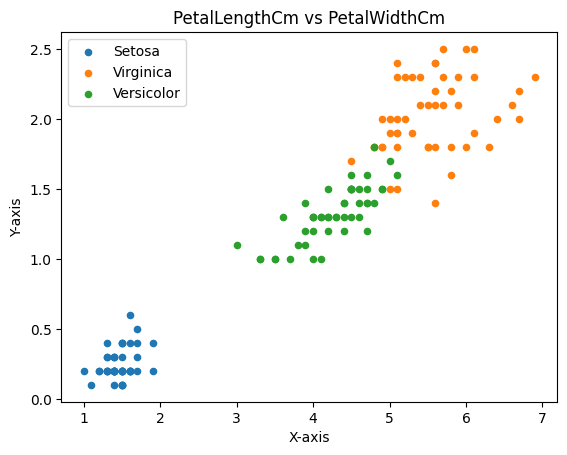

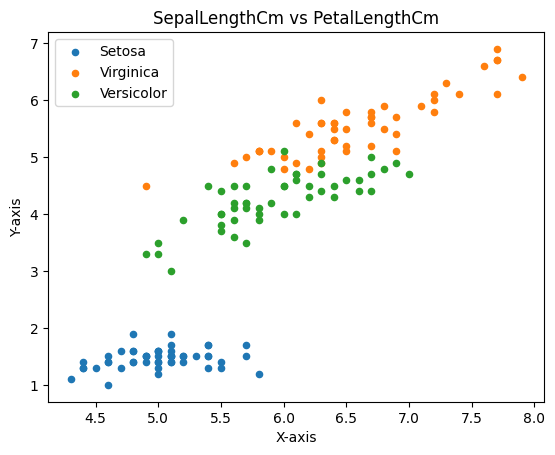

It is clear that Setosa can be easily differentiated from the other two varieties using the above features


In [35]:
# Scatter Plot
for i in species:
    plt.scatter(i[attributes[2]], i[attributes[3]], marker ="o", s = 20)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"{attributes[2]} vs {attributes[3]}")
plt.legend(names)
plt.show()

for i in species:
    plt.scatter(i[attributes[0]], i[attributes[2]], marker ="o", s = 20)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title(f"{attributes[0]} vs {attributes[2]}")
plt.legend(names)
plt.show()


print("It is clear that Setosa can be easily differentiated from the other two varieties using the above features")

**Line Chart**

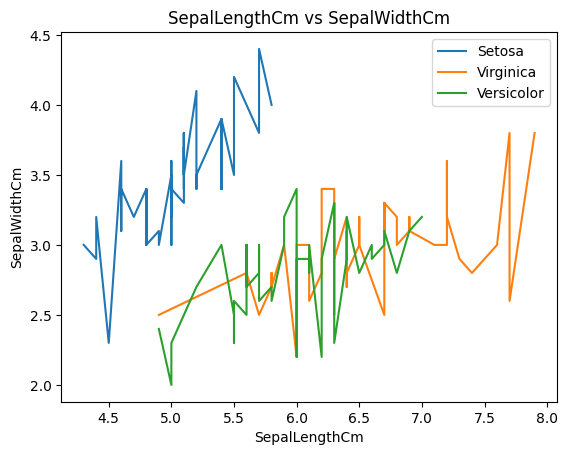

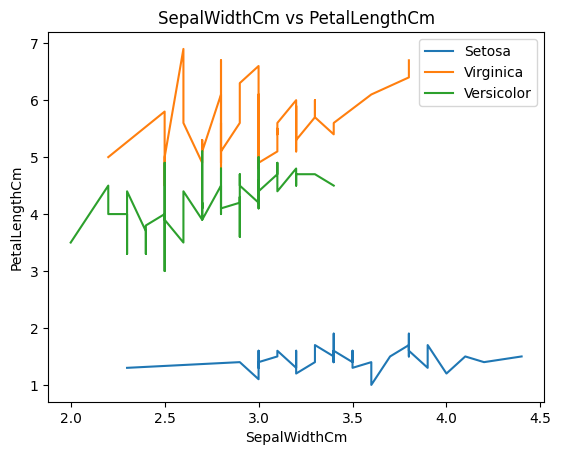

In [36]:
# Line Chart

for i in species:
    something = i.sort_values(by =attributes[0])
    plt.plot(np.array(something[attributes[0]]), np.array(something[attributes[1]]))
plt.xlabel(f"{attributes[0]}")
plt.ylabel(f"{attributes[1]}")
plt.title(f"{attributes[0]} vs {attributes[1]}")
plt.legend(names)
plt.show()

for i in species:
    something = i.sort_values(by =attributes[1])
    plt.plot(np.array(something[attributes[1]]), np.array(something[attributes[2]]))
plt.xlabel(f"{attributes[1]}")
plt.ylabel(f"{attributes[2]}")
plt.title(f"{attributes[1]} vs {attributes[2]}")
plt.legend(names)
plt.show()

**Radar Chart**

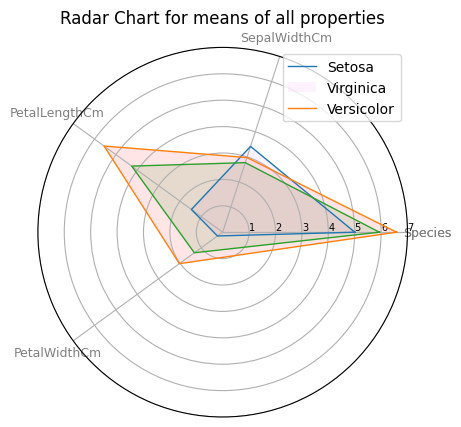

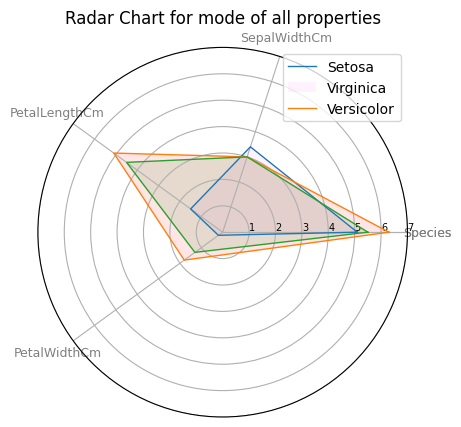

Observation: 
Virginica and Versicolor seem to have their properties in similar ratios while the ratios are visibly different for Setosa


In [37]:
# Set data
# number of variable
categories=list(virginica)[1:]
N = len(categories)

# first line of the data frame.
# values_setosa=setosa_df.loc[0].drop('Id').values.flatten().tolist()
values_setosa = [statistics.mean(setosa["SepalLengthCm"]), statistics.mean(setosa["SepalWidthCm"]),  statistics.mean(setosa["PetalLengthCm"]),  statistics.mean(setosa["PetalWidthCm"])]
values_virginica=[statistics.mean(virginica["SepalLengthCm"]), statistics.mean(virginica["SepalWidthCm"]),  statistics.mean(virginica["PetalLengthCm"]),  statistics.mean(virginica["PetalWidthCm"])]
values_versicolor=[statistics.mean(versicolor["SepalLengthCm"]), statistics.mean(versicolor["SepalWidthCm"]),  statistics.mean(versicolor["PetalLengthCm"]),  statistics.mean(versicolor["PetalWidthCm"])]

values_setosa += values_setosa[:1]
values_virginica += values_virginica[:1]
values_versicolor += values_versicolor[:1]
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * math.pi for n in range(N-1)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Plot and fill data
ax.plot(angles, values_setosa, linewidth=1, linestyle='solid')
ax.fill(angles, values_setosa, 'violet', alpha=0.1)

ax.plot(angles, values_virginica, linewidth=1, linestyle='solid')
ax.fill(angles, values_virginica, 'red', alpha=0.1)

ax.plot(angles, values_versicolor, linewidth=1, linestyle='solid')
ax.fill(angles, values_versicolor, 'green', alpha=0.1)

# Draw one axe per variable + add labels
plt.xticks(angles[:], categories, color='grey', size=9)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5, 6, 7], ["1","2","3", "4", "5", "6", "7"], size=7)
plt.ylim(0,7)

plt.title("Radar Chart for means of all properties")
plt.legend(["Setosa", "Virginica", "Versicolor"])
# Show the graph
plt.show()

values_setosa = [statistics.mode(setosa["SepalLengthCm"]), statistics.mode(setosa["SepalWidthCm"]),  statistics.mode(setosa["PetalLengthCm"]),  statistics.mode(setosa["PetalWidthCm"])]
values_virginica=[statistics.mode(virginica["SepalLengthCm"]), statistics.mode(virginica["SepalWidthCm"]),  statistics.mode(virginica["PetalLengthCm"]),  statistics.mode(virginica["PetalWidthCm"])]
values_versicolor=[statistics.mode(versicolor["SepalLengthCm"]), statistics.mode(versicolor["SepalWidthCm"]),  statistics.mode(versicolor["PetalLengthCm"]),  statistics.mode(versicolor["PetalWidthCm"])]

values_setosa += values_setosa[:1]
values_virginica += values_virginica[:1]
values_versicolor += values_versicolor[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Plot and fill data
ax.plot(angles, values_setosa, linewidth=1, linestyle='solid')
ax.fill(angles, values_setosa, 'violet', alpha=0.1)

ax.plot(angles, values_virginica, linewidth=1, linestyle='solid')
ax.fill(angles, values_virginica, 'red', alpha=0.1)

ax.plot(angles, values_versicolor, linewidth=1, linestyle='solid')
ax.fill(angles, values_versicolor, 'green', alpha=0.1)

# Draw one axe per variable + add labels
plt.xticks(angles[:], categories, color='grey', size=9)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5, 6, 7], ["1","2","3", "4", "5", "6", "7"], size=7)
plt.ylim(0,7)

plt.title("Radar Chart for mode of all properties")
plt.legend(["Setosa", "Virginica", "Versicolor"])
# Show the graph
plt.show()

print("Observation: ")
print("Virginica and Versicolor seem to have their properties in similar ratios while the ratios are visibly different for Setosa")

**Area Chart**

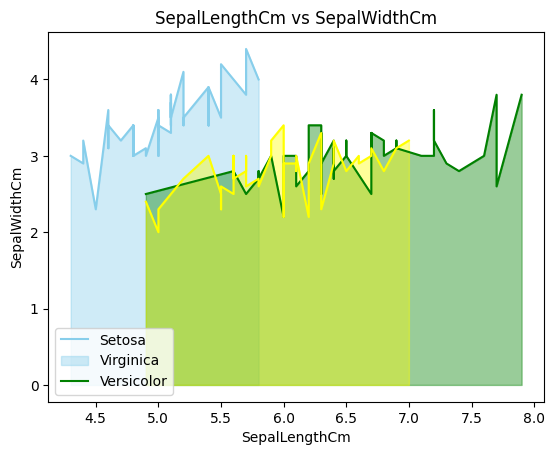

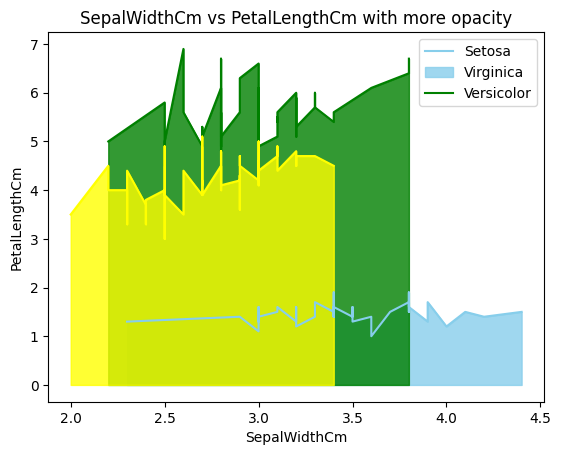

In [38]:
# Area Chart

colour = ["skyblue", "green", "yellow"]
cnt = 0
for i in species:
    something = i.sort_values(by =attributes[0])
    plt.plot(np.array(something[attributes[0]]), np.array(something[attributes[1]]), color = colour[cnt])
    plt.fill_between(np.array(something[attributes[0]]), np.array(something[attributes[1]]), color=colour[cnt], alpha=0.4)
    cnt += 1
plt.xlabel(f"{attributes[0]}")
plt.ylabel(f"{attributes[1]}")
plt.title(f"{attributes[0]} vs {attributes[1]}")
plt.legend(names)
plt.show()

cnt = 0
for i in species:
    something = i.sort_values(by =attributes[1])
    plt.plot(np.array(something[attributes[1]]), np.array(something[attributes[2]]), color = colour[cnt])
    plt.fill_between(np.array(something[attributes[1]]), np.array(something[attributes[2]]), color=colour[cnt], alpha=0.8)
    cnt += 1
plt.xlabel(f"{attributes[1]}")
plt.ylabel(f"{attributes[2]}")
plt.title(f"{attributes[1]} vs {attributes[2]} with more opacity")
plt.legend(names)
plt.show()


**Histogram**

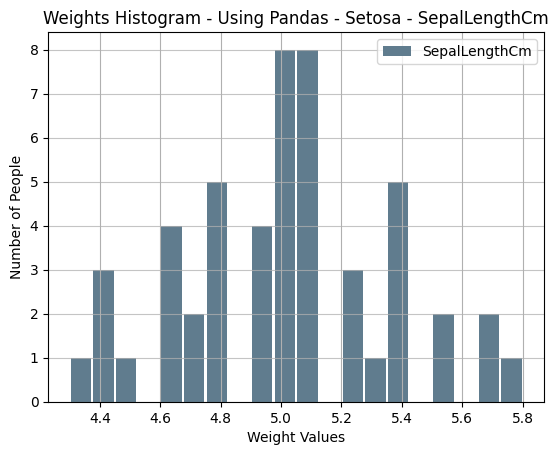

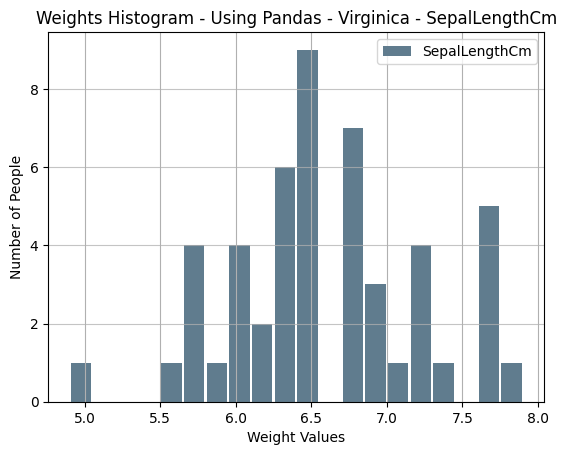

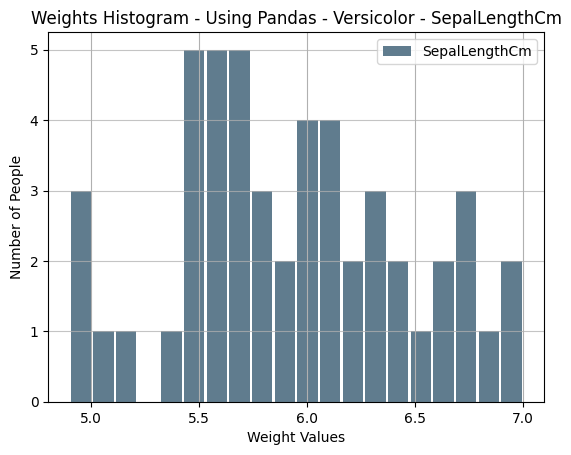

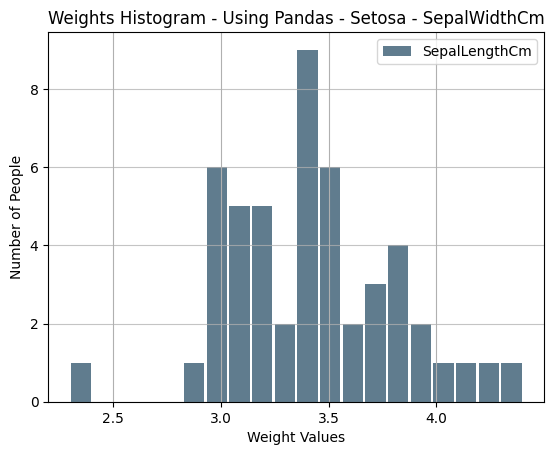

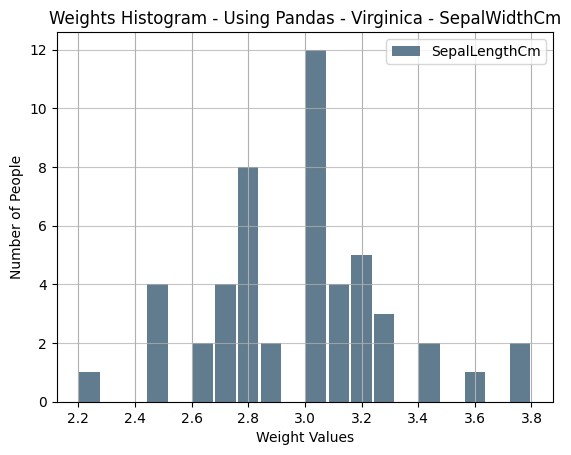

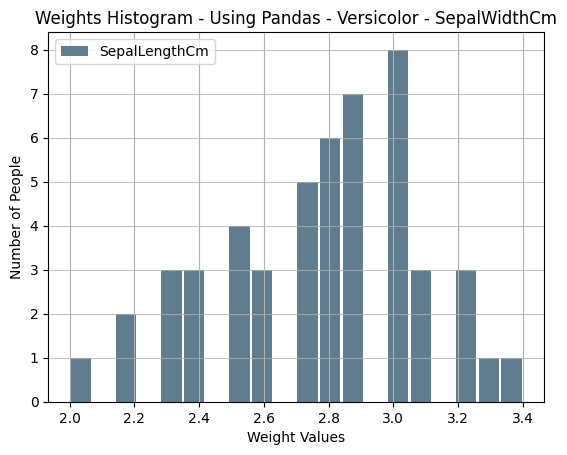

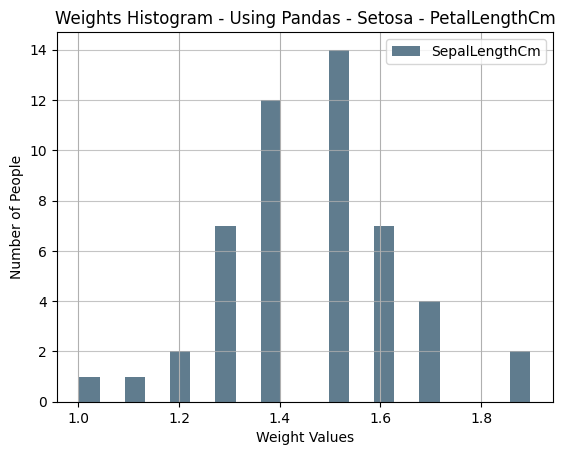

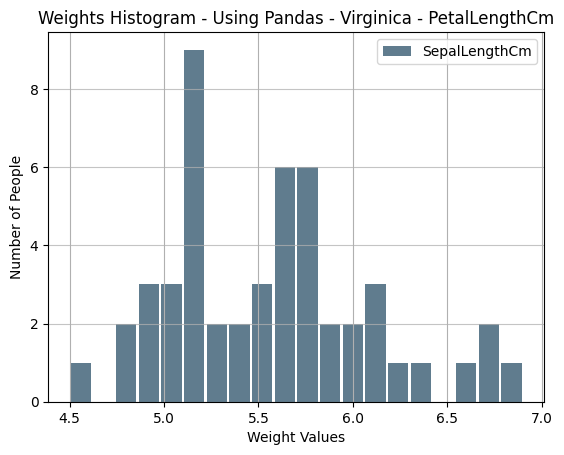

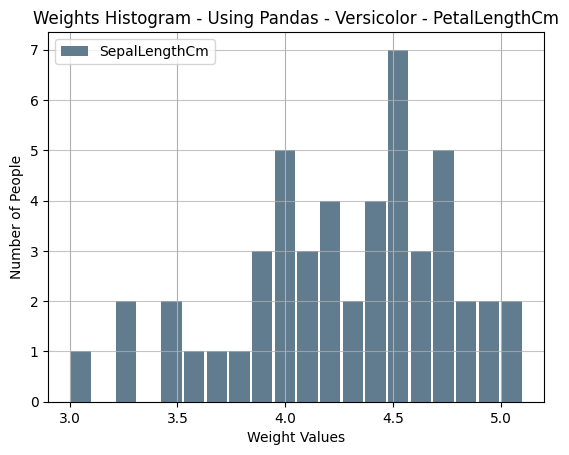

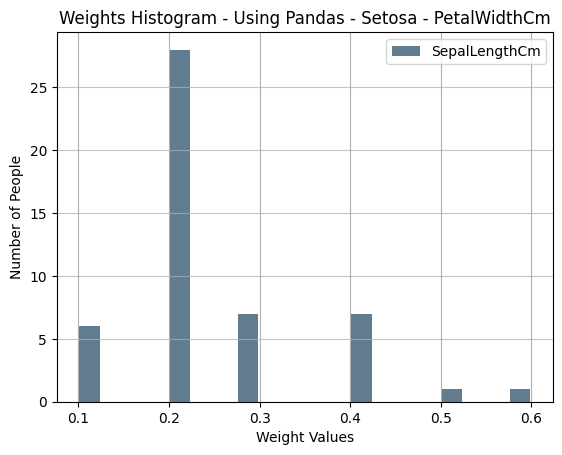

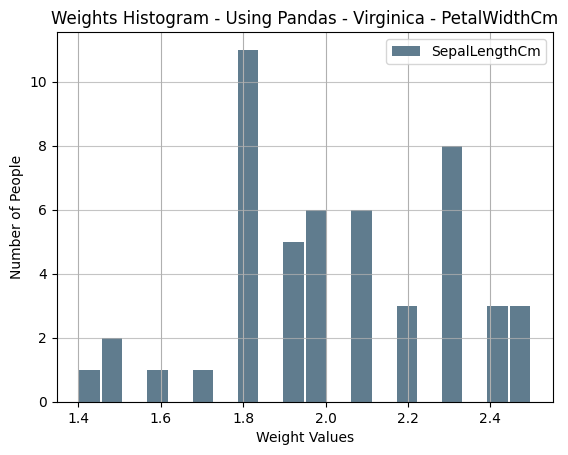

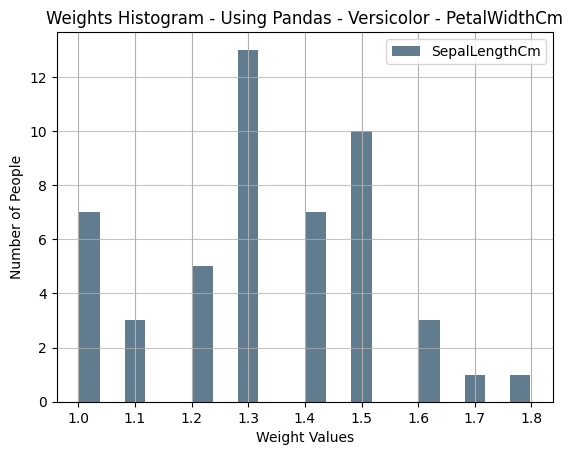

In [39]:
species = [setosa, virginica, versicolor]
properties = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
cnt = 0
for i in properties:
    cnt = 0
    for j in species:
        commutes = pd.Series(j[i])
        commutes.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
        plt.title(f"Weights Histogram - Using Pandas - {names[cnt]} - {i}")
        plt.xlabel("Weight Values")
        plt.ylabel("Number of People")
        plt.legend(["SepalLengthCm"])
        plt.grid(axis='y', alpha=0.75)
        plt.show()
        cnt += 1

## Q2. Given two arrays of numeric values, identify the suitable visualization mechanisms like Heat Maps to draw relationship between the given two sets. Also extend the same for the IRIS dataset for possible attribute subset of your choice.

In [40]:
# Generate array values
array1 = np.random.randint(0, 50, (10, 5))
array2 = np.random.randint(0, 50, (10, 10))

print("Data generated:\n")
print(f"Array1: \n {array1}")
print(f"\nArray2: \n {array2}")

Data generated:

Array1: 
 [[21 14 22  8 16]
 [43 26 27 25 29]
 [28 14 10 28 34]
 [46  5 10 46  4]
 [40  8 45  1 16]
 [14 23 14  6 27]
 [ 4  3 26 38 28]
 [16  4 12 35 35]
 [25 38 31  5 44]
 [42 31  2 37 14]]

Array2: 
 [[24 16 35 33 29 40  9 49 12 10]
 [ 5  5  9 45 42 27 48 18 48 40]
 [35  0  6  7  7 15 12 24 16 36]
 [ 8 44 13 24 11 16 41 23  9 49]
 [47 27 10 36 47  7 33 44  1  9]
 [48  5 13 35 45 38 29 17 39 31]
 [33  5 14  0  7  3 48 37 16 23]
 [23 41 14 26 28 22 46 34  4 13]
 [ 4 43  1 39  1 42 33 15  3 15]
 [15 10 31 46 38 34 16  6  4 36]]


**Heat Map**

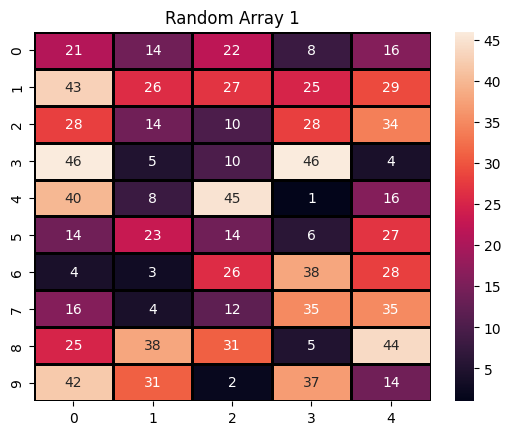

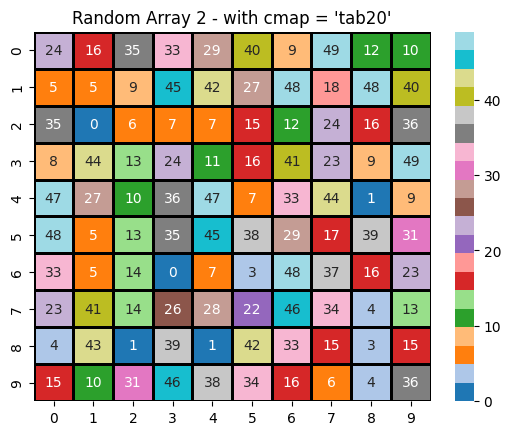

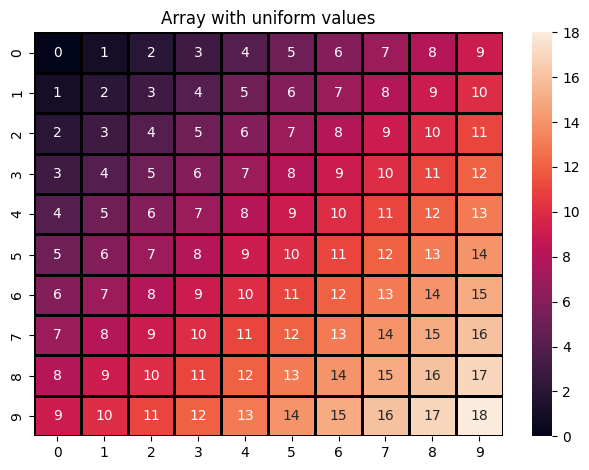

In [41]:
heatmap = sns.heatmap(array1, annot = True, linecolor = "black", linewidths = 2)
plt.title("Random Array 1")
plt.show()
heatmap1 = sns.heatmap(array2, cmap = "tab20", annot = True, linecolor = "black", linewidths = 2)
plt.title("Random Array 2 - with cmap = 'tab20'")
plt.show()

# Uniform Dataset
arr = []

for i in range(10):
    a = []
    for j in range(10):
        a.append(i+j)
    arr.append(a)

heatmap2 =  sns.heatmap(arr, annot = True, linecolor = "black", linewidths = 2)
plt.title("Array with uniform values")
plt.tight_layout()
plt.show()

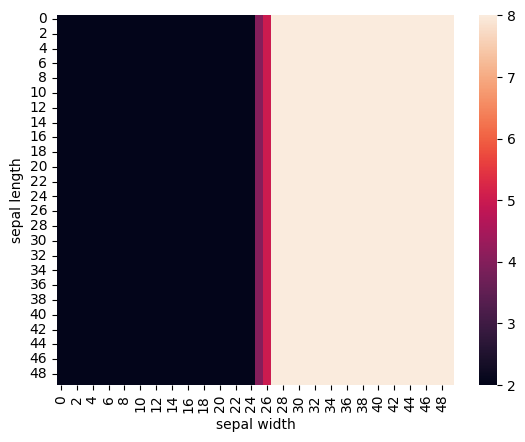

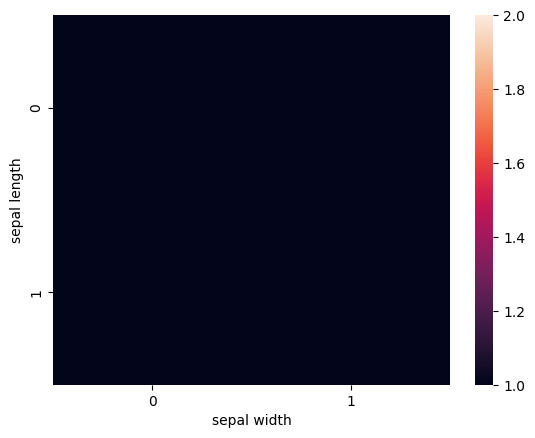

In [16]:
# Heat Maps in Iris Dataset
# Generate data

minimum = int(min((min(data["SepalLengthCm"]), min(data["SepalWidthCm"]))))
maximum = int(max((max(data["SepalLengthCm"]), max(data["SepalWidthCm"]))))

sepal_length = [[0]*(maximum - minimum)*10]*(maximum-minimum)*10

for i in range(len(sepal_length)):
    width = minimum + (0.1*(i+1))
    for j in range(len(sepal_length[0])):
        length = minimum + (0.1*j)
        sepal_length[i][j] = len(data[(data["SepalLengthCm"] < length) & (data["SepalWidthCm"] < width)])        


heatmap_sepal = sns.heatmap(sepal_length, vmin = 2, vmax = 8)
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.show()

correlation_matrix = np.corrcoef(data["SepalLengthCm"], data["SepalWidthCm"])
heatmap_sepal = sns.heatmap(correlation_matrix, vmin = 1, vmax = 2)
plt.xlabel("sepal width")
plt.ylabel("sepal length")
plt.show()

## Q3 Explore the usage of correlogram using the in-built packages for IRIS dataset of your choice and list the inferences drawn from the plots. 

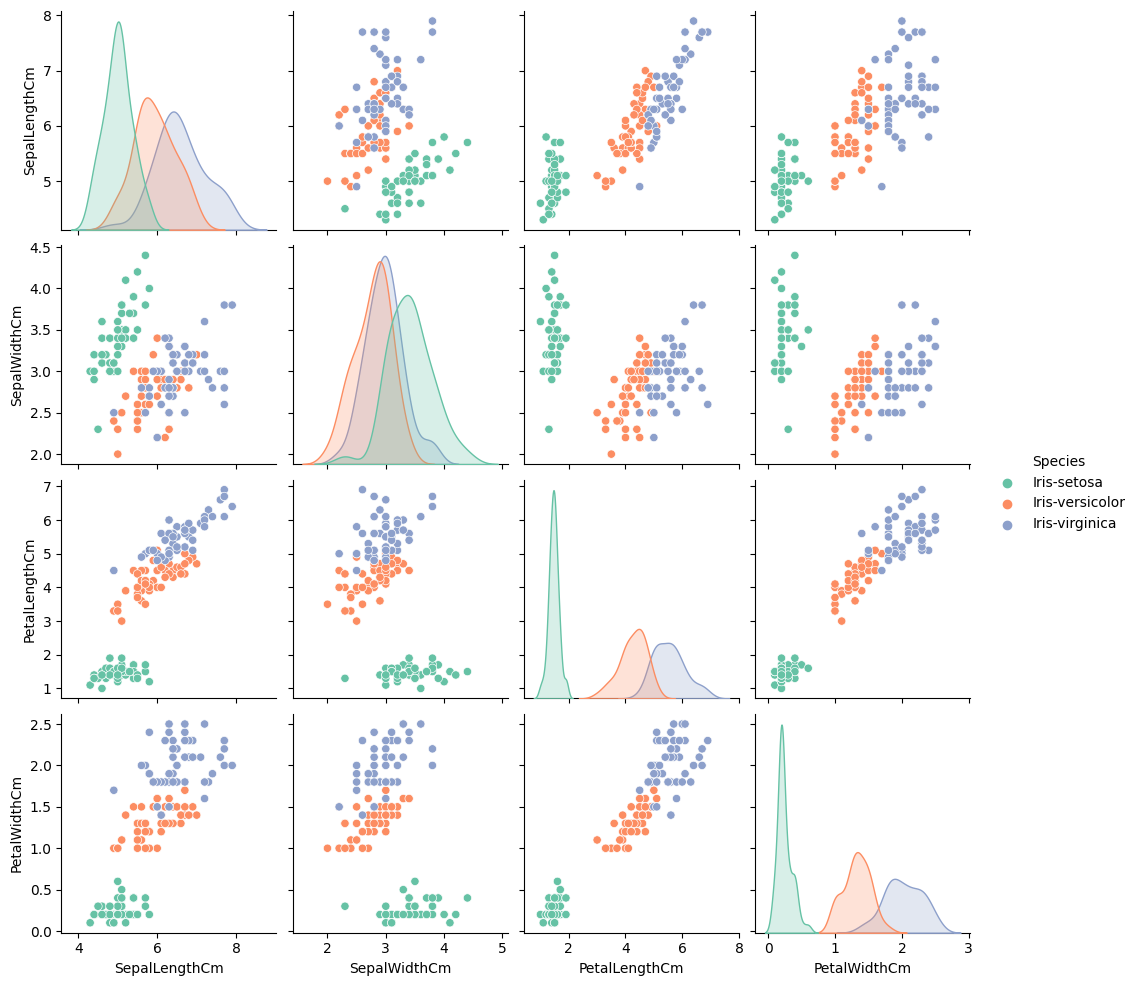

In [44]:
# Correlogram
df = data
# df.drop(columns=df.columns[0], axis=1,  inplace=True)
sns.pairplot(df, kind="scatter", hue="Species", palette="Set2")

plt.show()



**INFERENCES**
1. It is clearly noticeable that Setosa is easily distinguishable from the other two types of flowers
2. Petal Width against Sepal Width can help us distinguish all the three flower types easily

## Q4. Test Drive the hierarchical data visualization techniques like TreeMap for the below given data.

(0.0, 100.0, 0.0, 100.0)

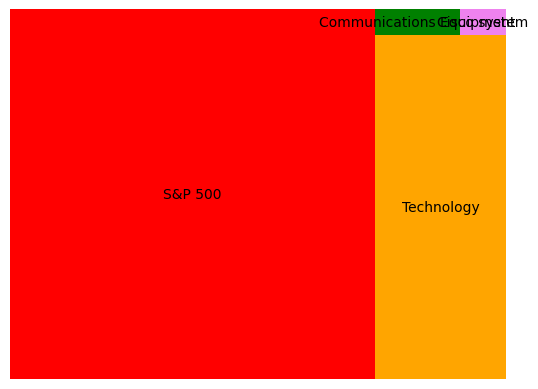

In [45]:
sp = 24300
technology = 8130
comm_equip = 390.8
cisco = 213.7
# T - Trillion - 10^12; B - Billion - 10^9
summ = sp + technology + comm_equip + cisco
colors = ["red","orange","green","violet"]
labels=["S&P 500", "Technology", "Communications Equipment", "Cisco system"]
# squarify.plot(sizes=[sp/summ, technology/summ, comm_equip/summ, cisco/summ],label=labels,color=colors,alpha=1)
squarify.plot(sizes=[sp, technology, comm_equip, cisco],label=labels,color=colors,alpha=1)
plt.axis("off")

